Импорты

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import preprocessing
from sklearn.tree import plot_tree

Открытие файлов

In [8]:

test = pd.read_csv('test.csv')
test

FileNotFoundError: ignored

In [ ]:
train = pd.read_csv('train.csv')
train

,reco_id_curr,target,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,...,document_18_flag,document_19_flag,document_20_flag,document_21_flag,requests_bki_hour,requests_bki_day,requests_bki_week,requests_bki_month,requests_bki_qrt,requests_bki_year
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261379,279382,0,Cash loans,F,Y,Y,0,135000.0,545040.0,25407.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
261380,167420,0,Cash loans,M,N,Y,1,135000.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0
261381,123279,0,Cash loans,M,N,Y,0,135000.0,477000.0,23076.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
261382,452171,0,Cash loans,F,Y,N,2,157500.0,755190.0,36328.5,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
print(test.keys())

Index(['reco_id_curr', 'contract_type_name', 'gender', 'own_car_flag',
       'own_realty_flag', 'children_count', 'income', 'loan_body',
       'annuity_payment', 'goods_price',
       ...
       'document_18_flag', 'document_19_flag', 'document_20_flag',
       'document_21_flag', 'requests_bki_hour', 'requests_bki_day',
       'requests_bki_week', 'requests_bki_month', 'requests_bki_qrt',
       'requests_bki_year'],
      dtype='object', length=121)


In [ ]:
print (train.keys())

Index(['reco_id_curr', 'target', 'contract_type_name', 'gender',
       'own_car_flag', 'own_realty_flag', 'children_count', 'income',
       'loan_body', 'annuity_payment',
       ...
       'document_18_flag', 'document_19_flag', 'document_20_flag',
       'document_21_flag', 'requests_bki_hour', 'requests_bki_day',
       'requests_bki_week', 'requests_bki_month', 'requests_bki_qrt',
       'requests_bki_year'],
      dtype='object', length=122)


Построение графиков

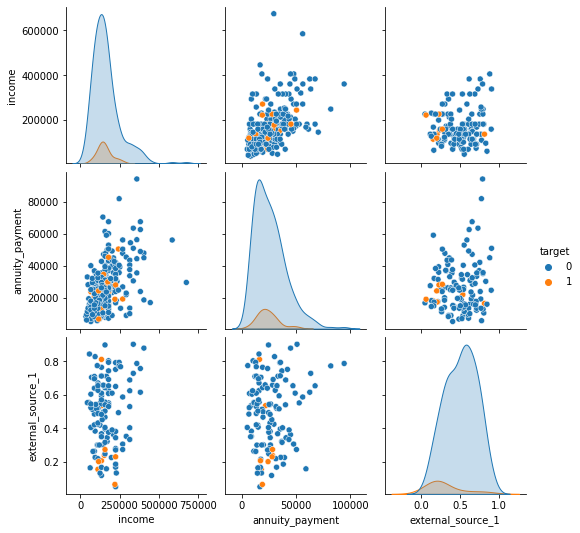

In [ ]:
data = train[['target','income','annuity_payment','external_source_1']]
np.random.seed(2023)
data = data.sample(300)

sns.pairplot(data, hue ='target')
plt.show()

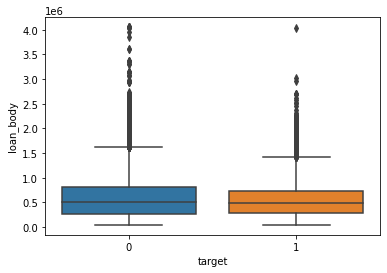

In [ ]:
sns.boxplot(data=train, y="loan_body", x="target")

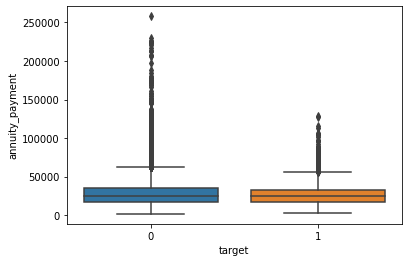

In [ ]:
sns.boxplot(data=train, y="annuity_payment", x="target")

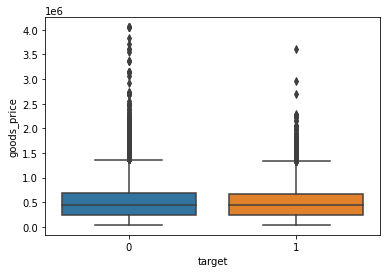

In [ ]:
sns.boxplot(data=train, y="goods_price", x="target")

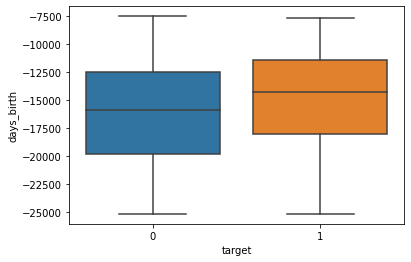

In [ ]:
sns.boxplot(data=train, y="days_birth", x="target")

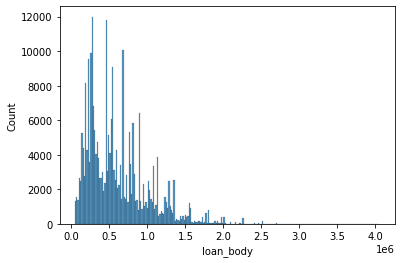

In [ ]:
sns.histplot(data=train, x="loan_body")

Предобработка данных

In [ ]:
test['fondkapremon_mode'].value_counts()

reg oper account         11080
reg oper spec account     1873
not specified              858
org spec account           823
Name: fondkapremon_mode, dtype: int64

In [ ]:
train['contract_type_name_is_cash'] = (train['contract_type_name'] == "Cash loans")
#train['contract_type_name_is_revolving'] = (train['contract_type_name'] == "Revolving loans")

train['gender_is_male'] = (train['gender'] == "M")
#train['gender_is_female'] = (train['gender'] == "F")

train['car_N'] = (train['own_car_flag'] == "N")
#train['car_Y'] = (train['own_car_flag'] == "Y")

train['reality_N'] = (train['own_realty_flag'] == "N")
#train['reality_Y'] = (train['own_realty_flag'] == "Y")

train['type_suite_name_Unaccompanied'] = (train['type_suite_name'] == "Unaccompanied")
train['type_suite_name_Family'] = (train['type_suite_name'] == "Family")
train['type_suite_name_Spouse'] = (train['type_suite_name'] == "Spouse, partner")
train['type_suite_name_Children'] = (train['type_suite_name'] == "Children")
train['type_suite_name_Other_B'] = (train['type_suite_name'] == "Other_B")
train['type_suite_name_Other_A'] = (train['type_suite_name'] == "Other_A")
#train['type_suite_name_Group'] = (train['type_suite_name'] == "Group of people")

train['income_type_name_Working'] = (train['income_type_name'] == "Working")
train['income_type_name_Commercial'] = (train['income_type_name'] == "Commercial associate")
train['income_type_name_Pensioner'] = (train['income_type_name'] == "Pensioner")
train['income_type_name_State'] = (train['income_type_name'] == "State servant")
train['income_type_name_Unemployed'] = (train['income_type_name'] == "Unemployed")
train['income_type_name_Student'] = (train['income_type_name'] == "Student")
train['income_type_name_Businessman'] = (train['income_type_name'] == "Businessman")
#train['income_type_name_Maternity'] = (train['income_type_name'] == "Maternity leave")

train['education_type_name_Secondary'] = (train['education_type_name'] == "Secondary / secondary special")
train['education_type_name_Higher'] = (train['education_type_name'] == "Higher education")
train['education_type_name_Incomplete'] = (train['education_type_name'] == "Incomplete higher")
train['education_type_name_Lower'] = (train['education_type_name'] == "Lower secondary")
#train['education_type_name_Academic'] = (train['education_type_name'] == "Academic degree")

train['family_status_name_Married'] = (train['family_status_name'] == "Married")
train['family_status_name_Single'] = (train['family_status_name'] == "Single / not married")
train['family_status_name_Civil'] = (train['family_status_name'] == "Civil marriage")
train['family_status_name_Separated'] = (train['family_status_name'] == "Separated")
train['family_status_name_Widow'] = (train['family_status_name'] == "Widow")
#train['family_status_name_Unknown'] = (train['family_status_name'] == "Unknown")

train['housing_type_name_House'] = (train['housing_type_name'] == "House / apartment")
train['housing_type_name_With'] = (train['housing_type_name'] == "With parents")
train['housing_type_name_Municipal'] = (train['housing_type_name'] == "Municipal apartment")
train['housing_type_name_Rented'] = (train['housing_type_name'] == "Rented apartment")
train['housing_type_name_Office'] = (train['housing_type_name'] == "Office apartment")
#train['housing_type_name_Co-op'] = (train['housing_type_name'] == "Co-op apartment")

train['type_of_occupation_Laborers'] = (train['type_of_occupation'] == "Laborers")
train['type_of_occupation_Sales'] = (train['type_of_occupation'] == "Sales staff")
train['type_of_occupation_Core'] = (train['type_of_occupation'] == "Core staff")
train['type_of_occupation_Managers'] = (train['type_of_occupation'] == "Managers")
train['type_of_occupation_Drivers'] = (train['type_of_occupation'] == "Drivers")
train['type_of_occupation_High'] = (train['type_of_occupation'] == "High skill tech staff")
train['type_of_occupation_Accountants'] = (train['type_of_occupation'] == "Accountants")
train['type_of_occupation_Medicine'] = (train['type_of_occupation'] == "Medicine staff")
train['type_of_occupation_Security'] = (train['type_of_occupation'] == "Security staff")
train['type_of_occupation_Cooking'] = (train['type_of_occupation'] == "Cooking staff")
train['type_of_occupation_Cleaning'] = (train['type_of_occupation'] == "Cleaning staff")
train['type_of_occupation_Private'] = (train['type_of_occupation'] == "Private service staff")
train['type_of_occupation_Low-skill'] = (train['type_of_occupation'] == "Low-skill Laborers")
train['type_of_occupation_Waiters/barmen'] = (train['type_of_occupation'] == "Waiters/barmen staff")
train['type_of_occupation_Secretaries'] = (train['type_of_occupation'] == "Secretaries")
train['type_of_occupation_Realty'] = (train['type_of_occupation'] == "Realty agents")
train['type_of_occupation_HR'] = (train['type_of_occupation'] == "HR staff")
#train['type_of_occupation_IT'] = (train['type_of_occupation'] == "IT staff")

train['start_weekday_appr_process_TUESDAY'] = (train['start_weekday_appr_process'] == "TUESDAY")
train['start_weekday_appr_process_WEDNESDAY'] = (train['start_weekday_appr_process'] == "WEDNESDAY")
train['start_weekday_appr_process_MONDAY'] = (train['start_weekday_appr_process'] == "MONDAY")
train['start_weekday_appr_process_THURSDAY'] = (train['start_weekday_appr_process'] == "THURSDAY")
train['start_weekday_appr_process_FRIDAY'] = (train['start_weekday_appr_process'] == "FRIDAY")
train['start_weekday_appr_process_SATURDAY'] = (train['start_weekday_appr_process'] == "SATURDAY")
#train['start_weekday_appr_process_SUNDAY'] = (train['start_weekday_appr_process'] == "SUNDAY")

train['type_of_organization_Business'] = (train['type_of_organization'] == "Business Entity Type 3")

train['mode_house_type_block'] = (train['mode_house_type'] == "block of flats")
train['mode_house_type_specific'] = (train['mode_house_type'] == "specific housing")

train['mode_walls_material_Panel'] = (train['mode_walls_material'] == "Panel")
train['mode_walls_material_Stone'] = (train['mode_walls_material'] == "Stone, brick")
train['mode_walls_material_Block'] = (train['mode_walls_material'] == "Block")
train['mode_walls_material_Wooden'] = (train['mode_walls_material'] == "Wooden")
train['mode_walls_material_Mixed'] = (train['mode_walls_material'] == "Mixed")
train['mode_walls_material_Monolithic'] = (train['mode_walls_material'] == "Monolithic")

train['emergency_state_mode_yes'] = (train['emergency_state_mode'] == "Yes")

train['fondkapremon_mode_reg_oper_account'] = (train['fondkapremon_mode'] == "reg oper account")
train['fondkapremon_mode_reg_oper_spec_account'] = (train['fondkapremon_mode'] == "reg oper spec account")
train['fondkapremon_mode_not_specified'] = (train['fondkapremon_mode'] == "not specified")

np.random.seed(2023)
train = train.sample(261384)

train

,reco_id_curr,target,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,...,mode_walls_material_Panel,mode_walls_material_Stone,mode_walls_material_Block,mode_walls_material_Wooden,mode_walls_material_Mixed,mode_walls_material_Monolithic,emergency_state_mode_yes,fondkapremon_mode_reg_oper_account,fondkapremon_mode_reg_oper_spec_account,fondkapremon_mode_not_specified
77941,400478,0,Cash loans,F,Y,Y,1,180000.0,497520.0,52920.0,...,False,True,False,False,False,False,False,False,False,False
225460,227126,0,Cash loans,F,N,N,2,130050.0,607500.0,19728.0,...,False,False,False,False,False,False,False,False,False,False
232891,445406,1,Cash loans,M,N,N,0,112500.0,152820.0,18135.0,...,False,False,False,False,False,False,False,False,False,False
27119,254143,0,Cash loans,F,Y,Y,1,382500.0,790830.0,62613.0,...,True,False,False,False,False,False,False,True,False,False
130606,406359,0,Cash loans,F,N,Y,1,319500.0,971280.0,54364.5,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169889,136888,0,Cash loans,F,Y,Y,0,90000.0,675000.0,27621.0,...,False,False,False,False,False,False,False,False,False,False
182967,169786,0,Revolving loans,M,Y,Y,1,315000.0,630000.0,31500.0,...,False,True,False,False,False,False,False,False,False,True
178630,203274,0,Cash loans,M,N,Y,0,112500.0,665892.0,21609.0,...,False,False,False,False,False,False,False,False,False,False
22041,316931,0,Cash loans,F,Y,N,0,90000.0,450000.0,16965.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test['contract_type_name_is_cash'] = (test['contract_type_name'] == "Cash loans")
#test['contract_type_name_is_revolving'] = (test['contract_type_name'] == "Revolving loans")

test['gender_is_male'] = (test['gender'] == "M")
#test['gender_is_female'] = (test['gender'] == "F")

test['car_N'] = (test['own_car_flag'] == "N")
#test['car_Y'] = (test['own_car_flag'] == "Y")

test['reality_N'] = (test['own_realty_flag'] == "N")
#test['reality_Y'] = (test['own_realty_flag'] == "Y")

test['type_suite_name_Unaccompanied'] = (test['type_suite_name'] == "Unaccompanied")
test['type_suite_name_Family'] = (test['type_suite_name'] == "Family")
test['type_suite_name_Spouse'] = (test['type_suite_name'] == "Spouse, partner")
test['type_suite_name_Children'] = (test['type_suite_name'] == "Children")
test['type_suite_name_Other_B'] = (test['type_suite_name'] == "Other_B")
test['type_suite_name_Other_A'] = (test['type_suite_name'] == "Other_A")
#test['type_suite_name_Group'] = (test['type_suite_name'] == "Group of people")

test['income_type_name_Working'] = (test['income_type_name'] == "Working")
test['income_type_name_Commercial'] = (test['income_type_name'] == "Commercial associate")
test['income_type_name_Pensioner'] = (test['income_type_name'] == "Pensioner")
test['income_type_name_State'] = (test['income_type_name'] == "State servant")
test['income_type_name_Unemployed'] = (test['income_type_name'] == "Unemployed")
test['income_type_name_Student'] = (test['income_type_name'] == "Student")
test['income_type_name_Businessman'] = (test['income_type_name'] == "Businessman")
#test['income_type_name_Maternity'] = (test['income_type_name'] == "Maternity leave")

test['education_type_name_Secondary'] = (test['education_type_name'] == "Secondary / secondary special")
test['education_type_name_Higher'] = (test['education_type_name'] == "Higher education")
test['education_type_name_Incomplete'] = (test['education_type_name'] == "Incomplete higher")
test['education_type_name_Lower'] = (test['education_type_name'] == "Lower secondary")
#test['education_type_name_Academic'] = (test['education_type_name'] == "Academic degree")

test['family_status_name_Married'] = (test['family_status_name'] == "Married")
test['family_status_name_Single'] = (test['family_status_name'] == "Single / not married")
test['family_status_name_Civil'] = (test['family_status_name'] == "Civil marriage")
test['family_status_name_Separated'] = (test['family_status_name'] == "Separated")
test['family_status_name_Widow'] = (test['family_status_name'] == "Widow")
#test['family_status_name_Unknown'] = (test['family_status_name'] == "Unknown")

test['housing_type_name_House'] = (test['housing_type_name'] == "House / apartment")
test['housing_type_name_With'] = (test['housing_type_name'] == "With parents")
test['housing_type_name_Municipal'] = (test['housing_type_name'] == "Municipal apartment")
test['housing_type_name_Rented'] = (test['housing_type_name'] == "Rented apartment")
test['housing_type_name_Office'] = (test['housing_type_name'] == "Office apartment")
#test['housing_type_name_Co-op'] = (test['housing_type_name'] == "Co-op apartment")

test['type_of_occupation_Laborers'] = (test['type_of_occupation'] == "Laborers")
test['type_of_occupation_Sales'] = (test['type_of_occupation'] == "Sales staff")
test['type_of_occupation_Core'] = (test['type_of_occupation'] == "Core staff")
test['type_of_occupation_Managers'] = (test['type_of_occupation'] == "Managers")
test['type_of_occupation_Drivers'] = (test['type_of_occupation'] == "Drivers")
test['type_of_occupation_High'] = (test['type_of_occupation'] == "High skill tech staff")
test['type_of_occupation_Accountants'] = (test['type_of_occupation'] == "Accountants")
test['type_of_occupation_Medicine'] = (test['type_of_occupation'] == "Medicine staff")
test['type_of_occupation_Security'] = (test['type_of_occupation'] == "Security staff")
test['type_of_occupation_Cooking'] = (test['type_of_occupation'] == "Cooking staff")
test['type_of_occupation_Cleaning'] = (test['type_of_occupation'] == "Cleaning staff")
test['type_of_occupation_Private'] = (test['type_of_occupation'] == "Private service staff")
test['type_of_occupation_Low-skill'] = (test['type_of_occupation'] == "Low-skill Laborers")
test['type_of_occupation_Waiters/barmen'] = (test['type_of_occupation'] == "Waiters/barmen staff")
test['type_of_occupation_Secretaries'] = (test['type_of_occupation'] == "Secretaries")
test['type_of_occupation_Realty'] = (test['type_of_occupation'] == "Realty agents")
test['type_of_occupation_HR'] = (test['type_of_occupation'] == "HR staff")
#test['type_of_occupation_IT'] = (test['type_of_occupation'] == "IT staff")

test['start_weekday_appr_process_TUESDAY'] = (test['start_weekday_appr_process'] == "TUESDAY")
test['start_weekday_appr_process_WEDNESDAY'] = (test['start_weekday_appr_process'] == "WEDNESDAY")
test['start_weekday_appr_process_MONDAY'] = (test['start_weekday_appr_process'] == "MONDAY")
test['start_weekday_appr_process_THURSDAY'] = (test['start_weekday_appr_process'] == "THURSDAY")
test['start_weekday_appr_process_FRIDAY'] = (test['start_weekday_appr_process'] == "FRIDAY")
test['start_weekday_appr_process_SATURDAY'] = (test['start_weekday_appr_process'] == "SATURDAY")
#test['start_weekday_appr_process_SUNDAY'] = (test['start_weekday_appr_process'] == "SUNDAY")

test['type_of_organization_Business'] = (test['type_of_organization'] == "Business Entity Type 3")

test['mode_house_type_block'] = (test['mode_house_type'] == "block of flats")
test['mode_house_type_specific'] = (test['mode_house_type'] == "specific housing")

test['mode_walls_material_Panel'] = (test['mode_walls_material'] == "Panel")
test['mode_walls_material_Stone'] = (test['mode_walls_material'] == "Stone, brick")
test['mode_walls_material_Block'] = (test['mode_walls_material'] == "Block")
test['mode_walls_material_Wooden'] = (test['mode_walls_material'] == "Wooden")
test['mode_walls_material_Mixed'] = (test['mode_walls_material'] == "Mixed")
test['mode_walls_material_Monolithic'] = (test['mode_walls_material'] == "Monolithic")

test['emergency_state_mode_yes'] = (test['emergency_state_mode'] == "Yes")

test['fondkapremon_mode_reg_oper_account'] = (test['fondkapremon_mode'] == "reg oper account")
test['fondkapremon_mode_reg_oper_spec_account'] = (test['fondkapremon_mode'] == "reg oper spec account")
test['fondkapremon_mode_not_specified'] = (test['fondkapremon_mode'] == "not specified")

test

,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,...,mode_walls_material_Panel,mode_walls_material_Stone,mode_walls_material_Block,mode_walls_material_Wooden,mode_walls_material_Mixed,mode_walls_material_Monolithic,emergency_state_mode_yes,fondkapremon_mode_reg_oper_account,fondkapremon_mode_reg_oper_spec_account,fondkapremon_mode_not_specified
0,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,False,False,False,False,False,False,False,False,False,False
1,100017,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,True,False,False,False,False,False,False,True,False,False
2,100019,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,False,False,False,False,False,False,False,False,False,False
3,100022,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,157500.0,...,False,True,False,False,False,False,False,True,False,False
4,100023,Cash loans,F,N,Y,1,90000.0,544491.0,17563.5,454500.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46122,456233,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,...,False,True,False,False,False,False,True,True,False,False
46123,456236,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,1575000.0,...,False,False,False,False,False,False,False,False,False,False
46124,456245,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,...,False,True,False,False,False,False,False,False,False,False
46125,456248,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train = train.fillna(0)

In [ ]:
test = test.fillna(0)

In [ ]:
all_columns = train.columns
minus_columns = ['contract_type_name', 'gender', 'own_car_flag', 'own_realty_flag', 'type_suite_name', 'income_type_name', 'education_type_name', 'family_status_name',
'housing_type_name', 'type_of_occupation', 'start_weekday_appr_process', 'type_of_organization', 'mode_house_type', 'mode_walls_material', 'emergency_state_mode',
'fondkapremon_mode']
train = train.drop(columns=minus_columns, axis=1)
train

,reco_id_curr,target,children_count,income,loan_body,annuity_payment,goods_price,population_relative_region,days_birth,days_employed,...,mode_walls_material_Panel,mode_walls_material_Stone,mode_walls_material_Block,mode_walls_material_Wooden,mode_walls_material_Mixed,mode_walls_material_Monolithic,emergency_state_mode_yes,fondkapremon_mode_reg_oper_account,fondkapremon_mode_reg_oper_spec_account,fondkapremon_mode_not_specified
77941,400478,0,1,180000.0,497520.0,52920.0,450000.0,0.018634,-15344,-481,...,False,True,False,False,False,False,False,False,False,False
225460,227126,0,2,130050.0,607500.0,19728.0,607500.0,0.014520,-13040,-797,...,False,False,False,False,False,False,False,False,False,False
232891,445406,1,0,112500.0,152820.0,18135.0,135000.0,0.005002,-10153,-315,...,False,False,False,False,False,False,False,False,False,False
27119,254143,0,1,382500.0,790830.0,62613.0,675000.0,0.046220,-11581,-631,...,True,False,False,False,False,False,False,True,False,False
130606,406359,0,1,319500.0,971280.0,54364.5,900000.0,0.024610,-17678,-712,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169889,136888,0,0,90000.0,675000.0,27621.0,675000.0,0.030755,-10082,-1722,...,False,False,False,False,False,False,False,False,False,False
182967,169786,0,1,315000.0,630000.0,31500.0,630000.0,0.032561,-12172,-3361,...,False,True,False,False,False,False,False,False,False,True
178630,203274,0,0,112500.0,665892.0,21609.0,477000.0,0.018029,-10122,-2092,...,False,False,False,False,False,False,False,False,False,False
22041,316931,0,0,90000.0,450000.0,16965.0,450000.0,0.022800,-10718,-2165,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test = test.drop(columns=minus_columns, axis=1)
test

,reco_id_curr,children_count,income,loan_body,annuity_payment,goods_price,population_relative_region,days_birth,days_employed,registration_timestamp,...,mode_walls_material_Panel,mode_walls_material_Stone,mode_walls_material_Block,mode_walls_material_Wooden,mode_walls_material_Mixed,mode_walls_material_Monolithic,emergency_state_mode_yes,fondkapremon_mode_reg_oper_account,fondkapremon_mode_reg_oper_spec_account,fondkapremon_mode_not_specified
0,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,False,False,False,False,False,False,False,False,False,False
1,100017,1,225000.0,918468.0,28966.5,697500.0,0.016612,-14086,-3028,-643.0,...,True,False,False,False,False,False,False,True,False,False
2,100019,0,157500.0,299772.0,20160.0,247500.0,0.020713,-8728,-1157,-3494.0,...,False,False,False,False,False,False,False,False,False,False
3,100022,0,112500.0,157500.0,7875.0,157500.0,0.046220,-17718,-7804,-8751.0,...,False,True,False,False,False,False,False,True,False,False
4,100023,1,90000.0,544491.0,17563.5,454500.0,0.015221,-11348,-2038,-1021.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46122,456233,0,225000.0,521280.0,23089.5,450000.0,0.014464,-16471,-286,-8291.0,...,False,True,False,False,False,False,True,True,False,False
46123,456236,0,585000.0,1575000.0,43443.0,1575000.0,0.028663,-20965,-1618,-1764.0,...,False,False,False,False,False,False,False,False,False,False
46124,456245,3,81000.0,269550.0,11871.0,225000.0,0.009175,-12961,-1046,-1398.0,...,False,True,False,False,False,False,False,False,False,False
46125,456248,0,153000.0,331920.0,16096.5,225000.0,0.022625,-16705,-7258,-9798.0,...,False,False,False,False,False,False,False,False,False,False


Построение и обучение модели с помощью "Decsion Tree Classifier"

In [ ]:
k = 0.2 
X_train = train[train.columns.drop(['target','income','days_birth','annuity_payment','family_members__count','average_apartments','requests_bki_hour'])].values
y_train = train['target'].values

X_test = test[test.columns.drop([ 'income','days_birth','annuity_payment','family_members__count','average_apartments','requests_bki_hour'])].values

In [ ]:
model = DecisionTreeClassifier (max_depth=5)

In [ ]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Получение предсказаний

In [ ]:
y_pred = model.predict_proba(X_test)

model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00092747,
       0.        , 0.        , 0.        , 0.00246792, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04550341,
       0.46746079, 0.46085569, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_pred

array([[0.9120534 , 0.0879466 ],
       [0.95586816, 0.04413184],
       [0.9120534 , 0.0879466 ],
       ...,
       [0.90635645, 0.09364355],
       [0.90635645, 0.09364355],
       [0.94880378, 0.05119622]])

[Text(0.5, 0.9166666666666666, 'X[25] <= 0.395\ngini = 0.148\nsamples = 261384\nvalue = [240274, 21110]'),
 Text(0.25, 0.75, 'X[26] <= 0.401\ngini = 0.244\nsamples = 66511\nvalue = [57058, 9453]'),
 Text(0.125, 0.5833333333333334, 'X[25] <= 0.124\ngini = 0.314\nsamples = 32725\nvalue = [26355, 6370]'),
 Text(0.0625, 0.4166666666666667, 'X[24] <= 0.395\ngini = 0.403\nsamples = 7020\nvalue = [5059, 1961]'),
 Text(0.03125, 0.25, 'X[109] <= 0.5\ngini = 0.42\nsamples = 5888\nvalue = [4122, 1766]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.369\nsamples = 2332\nvalue = [1762, 570]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.446\nsamples = 3556\nvalue = [2360, 1196]'),
 Text(0.09375, 0.25, 'X[8] <= 9.5\ngini = 0.285\nsamples = 1132\nvalue = [937, 195]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.258\nsamples = 964\nvalue = [817, 147]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.408\nsamples = 168\nvalue = [120, 48]'),
 Text(0.1875, 0.4166666666666667, 'X[26] <= 0.0\ngini 

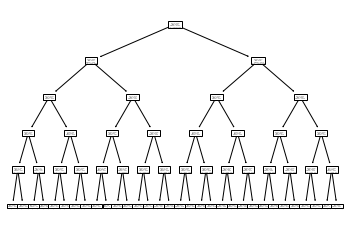

In [ ]:
plot_tree(model)

Получение ответа и запись его в файл

In [ ]:
submission = pd.DataFrame({'reco_id_curr': test['reco_id_curr'], 'target': model.predict_proba(X_test)[:, 1]}).set_index('reco_id_curr')
submission.to_csv('answer.csv')